In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import scipy
import itertools as itt
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

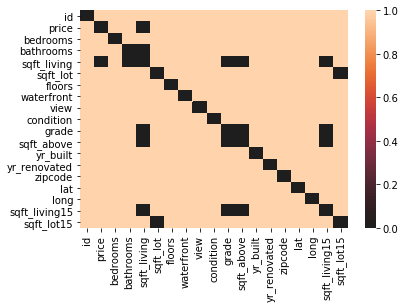

In [5]:
sns.heatmap(((df.corr() < 0.7) & (df.corr() > -0.7)), center=0)

In [6]:
print('Waterfront ' + str(round(df.isna().sum()['waterfront']/len(df.waterfront) *100, 2)) + ' % NaN')

print('View ' + str(round(df.isna().sum()['view']/len(df.view) *100, 2)) + ' % NaN')

print('Year Renovated ' + str(round(df.isna().sum()['yr_renovated']/len(df.yr_renovated) *100, 2)) + ' % NaN')

Waterfront 11.0 % NaN
View 0.29 % NaN
Year Renovated 17.79 % NaN


In [7]:
df = df.rename(columns={'date' : 'date_sold'})
df = df.rename(columns={'price' : 'price_sold'})
df = df.rename(columns={'bathrooms' : 'bathrooms_per_bedroom'})
df = df.rename(columns={'view' : 'view_grade'})
df = df.rename(columns={'sqft_above' : 'sqft_not_basement'})
df = df.rename(columns={'sqft_living15' : 'sqft_living_15_neighbours'})
df = df.rename(columns={'sqft_lot15' : 'sqft_lot_15_neighbours'})

In [8]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df = df.fillna(value={'yr_renovated' : 0})
df = df.fillna(value={'view_grade' : df.view_grade.median()})
df = df.fillna(value={'waterfront' : df.waterfront.median()})

In [10]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Changed ? in sqft_basement to actual value

In [11]:
df.sqft_basement = (df.sqft_living - df.sqft_not_basement)

In [12]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                           21597 non-null int64
date_sold                    21597 non-null object
price_sold                   21597 non-null float64
bedrooms                     21597 non-null int64
bathrooms_per_bedroom        21597 non-null float64
sqft_living                  21597 non-null int64
sqft_lot                     21597 non-null int64
floors                       21597 non-null float64
waterfront                   21597 non-null float64
view_grade                   21597 non-null float64
condition                    21597 non-null int64
grade                        21597 non-null int64
sqft_not_basement            21597 non-null int64
sqft_basement                21597 non-null int64
yr_built                     21597 non-null int64
yr_renovated                 21597 non-null float64
zipcode                      21597 non-null int64
lat                         

Changing all dates to datetime objects

In [14]:
df.date_sold = pd.to_datetime(df.date_sold)
df.yr_renovated = df.yr_renovated.astype('int64')

In [15]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df.columns

Index(['id', 'date_sold', 'price_sold', 'bedrooms', 'bathrooms_per_bedroom',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view_grade',
       'condition', 'grade', 'sqft_not_basement', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living_15_neighbours',
       'sqft_lot_15_neighbours'],
      dtype='object')

In [59]:
df['coordinates'] = list(zip(df.lat, df.long))

In [18]:
df.coordinates.head()

0               (47.5112, -122.257)
1    (47.721000000000004, -122.319)
2    (47.7379, -122.23299999999999)
3    (47.5208, -122.39299999999999)
4               (47.6168, -122.045)
Name: coordinates, dtype: object

In [57]:
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

In [58]:
df.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [19]:
# Could also have a choice argument that gives the number of choices in any set of headers
# to do this would require another for loop going over the second argument of combins
# also could have a dataframe argument to allow the function to be used elsewhere

def analise(head_list):
    combins = list(itt.combinations(head_list, 3))
    for i in range(len(combins)):
        headvar1 = combins[i][0]
        headvar2 = combins[i][1]
        headvar3 = combins[i][2]
        minidf = pd.DataFrame({headvar1:df[headvar1], headvar2:df[headvar2],
                               headvar3:df[headvar3], 'price_sold':df['price_sold']})
        X = minidf.drop('price_sold',axis=1)
        y = minidf['price_sold']
        print("This is the head of the {}, {}, {} dataframe".format(headvar1, headvar2, headvar3))
        display(X.head())

        # Setting up the LEARNER
        X = sm.add_constant(X)
        model_sm = sm.OLS(y,X)

         # Actually LEARNING
        results = model_sm.fit()

        # Evaluating performance
        r2 = results.rsquared.round(2)
        print('R2 = {}'.format(r2))

        # Understanding the LEARNED model
        est_b = results.params
        print(est_b.round(4))

        # Getting the pvalues out
        pvals = results.pvalues
        print('Pvalues: \n {} \n'.format(pvals))

        # Need to clear xy after each pass through i
        X = []
        Y= []

#         Idea is to go through i, make a minidata frame, do analysis on it then 
#         return the pvalues
        

In [20]:
list(df.columns)[3:-6]

['bedrooms',
 'bathrooms_per_bedroom',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view_grade',
 'condition',
 'grade',
 'sqft_not_basement',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [21]:
hlist = ['condition', 'grade', 'yr_renovated', 'view_grade', 'sqft_lot', 'sqft_living']

In [22]:
# analise(list(df.columns)[3:-6])

In [23]:
# list(df.drop(['price_sold', 'id', 'waterfront', 'date_sold', 'zipcode', 'lat', 'long', 'coordinates'], axis=1).columns)
# This is just picking out what we think of as 'good' variables

['bedrooms',
 'bathrooms_per_bedroom',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view_grade',
 'condition',
 'grade',
 'sqft_not_basement',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living_15_neighbours',
 'sqft_lot_15_neighbours']

In [24]:
# New function that can take any of our dataframes and returns an R2 ranking for each group of 3 of its columns
# A number of unhelpful (in terms of R2) columns are dropped

def r2(data):
    head_list = list(df.drop(['price_sold', 'id', 'waterfront', 'date_sold', 
                              'zipcode', 'lat', 'long', 'coordinates'], axis=1).columns)
    combins = list(itt.combinations(head_list, 3))
    r2data = pd.DataFrame()
    for i in range(len(combins)):
        headvar1 = combins[i][0]
        headvar2 = combins[i][1]
        headvar3 = combins[i][2]
        triple = '{}, {}, and {}'.format(headvar1, headvar2, headvar3)
        minidf = pd.DataFrame({headvar1:data[headvar1], headvar2:data[headvar2],
                               headvar3:data[headvar3], 'price_sold':data['price_sold']})
        X = minidf.drop('price_sold',axis=1)
        y = minidf['price_sold']

        # Setting up the LEARNER
        X = sm.add_constant(X)
        model_sm = sm.OLS(y,X)

         # Actually LEARNING
        results = model_sm.fit()

        # Evaluating performance
        r2 = results.rsquared.round(2)
        
        # Add to the R2 dataframe
        triple_r2_df = pd.DataFrame(data = {'Triples': [triple, 'delete me'], 'R_squared': [r2,'and me']})
        triple_r2_df = triple_r2_df[:1]
        
        r2data = r2data.append(triple_r2_df, ignore_index=True)
        
    r2data = r2data.set_index('Triples')
    return r2data


In [25]:
# shape of r2data data frame is 364 long

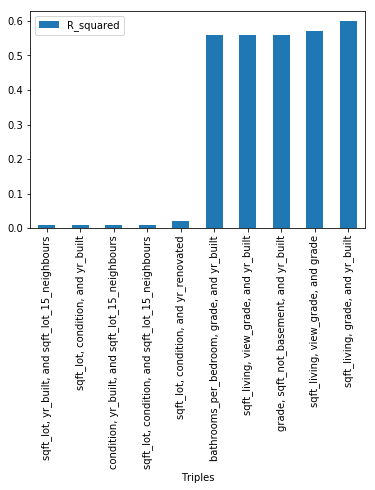

In [47]:
r2(df).sort_values(by=['R_squared'])[:5].append(r2(df).sort_values(by=['R_squared'])[-5:]).plot.bar()

In [60]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours,coordinates
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(47.721000000000004, -122.319)"
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.23299999999999)"
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.39299999999999)"
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)"


In [61]:
df.view_grade.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view_grade, dtype: int64

In [69]:
dffloor1 = df.loc[df['floors'] == 1]
dffloor1.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours,coordinates
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)"
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.23299999999999)"
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.39299999999999)"
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)"
5,7237550310,2014-05-12,1230000.0,4,4.5,5420,101930,1.0,0.0,0.0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,"(47.6561, -122.005)"


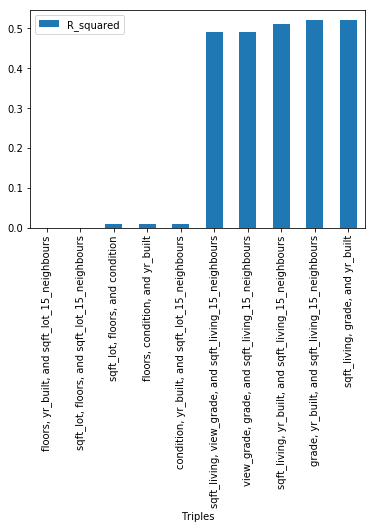

In [70]:
r2(dffloor1).sort_values(by=['R_squared'])[:5].append(r2(dffloor1).sort_values(by=['R_squared'])[-5:]).plot.bar()

What types of neighbourhoods are easier to predict by?
